In [1]:
#!pip install skimpy
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve,accuracy_score
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# đọc file data
df = pd.read_csv("digital_marketing_campaign_dataset.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [4]:
df.tail()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1
7999,15999,31,Female,93002,Email,Awareness,7743.627070,0.185670,0.057228,15,6.964739,12.763660,2,18,9,9,341,IsConfid,ToolConfid,0


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8000   │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 20     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA % ┃ mean   ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID         │   0 │    0 │  12000 │    2310 │    8000 │   10000 │  12000 │  14000 │  16000 │ ▇▇▇▇▇▇ │  │
│ │ Age                │   0 │    0 │  43.63 │    14.9 │      18 │      31 │     43 │     56 │     69 │ ▇▇▇▇▇▇ │  │
│ │ Income             │   0 │    0 │  84660 │   37580 │   20010 │   51740 │  84930 │ 116800 │ 150000 │ ▇▇▇▇▇▇ │  │
│ │ AdSpend            │   0 │    0 │   5001 │    2838 │   100.1 │    2523 │   5013 │   7408 │   9998 │ ▇▇▇▇▇▇ │  │
│ │ ClickThroughRate   │   0 │    0 │ 0.1548 │ 0.08401 │    0.01 │ 0.08263 │ 0.1545 │ 0.2282 │    0.3 │ ▇▇▇▇▇▇ │  │
│ │ ConversionRate     │   0 │    0 │ 0.1044 │ 0.05488 │ 0.01002 │ 0.05641 │  0.104 │ 0.1521 │    0.2 │ ▇▇▇▇▇▇ │  │
│ │ WebsiteVisits      │   0 │    0 │  24.75 │   14.31 │       0 │      13 │     25 │     37 │     49 │ ▇▇▇▇▇▇ │  │
│ │ PagesPerVisit      │   0 │    0 │  5.549 │   2.607 │       1 │   3.302 │  5.534 │  7.836 │  9.999 │ ▇▇▇▇▇▇ │  │
│ │ TimeOnSite         │   0 │    0 │  7.728 │   4.228 │  0.5017 │   4.068 │  7.683 │  11.48 │     15 │ ▇▇▇▇▇▇ │  │
│ │ SocialShares       │   0 │    0 │   49.8 │    28.9 │       0 │      25 │     50 │     75 │     99 │ ▇▇▇▇▇▇ │  │
│ │ EmailOpens         │   0 │    0 │  9.477 │   5.711 │       0 │       5 │      9 │     14 │     19 │ ▇▆▇▆▆▇ │  │
│ │ EmailClicks        │   0 │    0 │  4.467 │   2.857 │       0 │       2 │      4 │      7 │      9 │ ▇▃▇▃▇▇ │  │
│ │ PreviousPurchases  │   0 │    0 │  4.486 │   2.888 │       0 │       2 │      4 │      7 │      9 │ ▇▃▇▃▇▇ │  │
│ │ LoyaltyPoints      │   0 │    0 │   2490 │    1430 │       0 │    1255 │   2497 │   3702 │   4999 │ ▇▇▇▇▇▇ │  │
│ │ Conversion         │   0 │    0 │ 0.8765 │   0.329 │       0 │       1 │      1 │      1 │      1 │ ▁    ▇ │  │
│ └────────────────────┴─────┴──────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                               │     0 │         0 │                        1 │                 8000 │  │
│ │ CampaignChannel                      │     0 │      

In [5]:
print("So dong trung lap : ",df.duplicated().sum())

So dong trung lap :  0


In [6]:
discrete_variables = ["Age", "WebsiteVisits", "SocialShares", "EmailOpens", "EmailClicks", "PreviousPurchases"]
continuous_variables = ["Income", "AdSpend", "ClickThroughRate", "ConversionRate", "PagesPerVisit", "TimeOnSite", "LoyaltyPoints"]
categorical_variables = ["Gender", "CampaignType", "CampaignChannel", "Conversion"]

In [7]:
df = df.drop(columns = ['AdvertisingTool', 'AdvertisingPlatform','CustomerID','ConversionRate'])
df.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0,2.046847,13.993370,6,6,6,8,4345,1


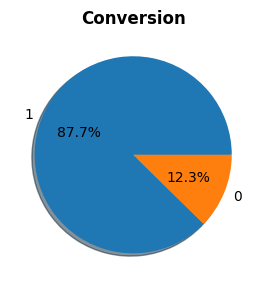

In [8]:
plt.figure(figsize = (5, 3.2))
plt.pie(x = Counter(df["Conversion"]).values(),
        labels = Counter(df["Conversion"]).keys(),
        autopct = "%.1f%%",
        shadow = True)
plt.title("Conversion", fontsize = 12, fontweight = "bold")
plt.show()

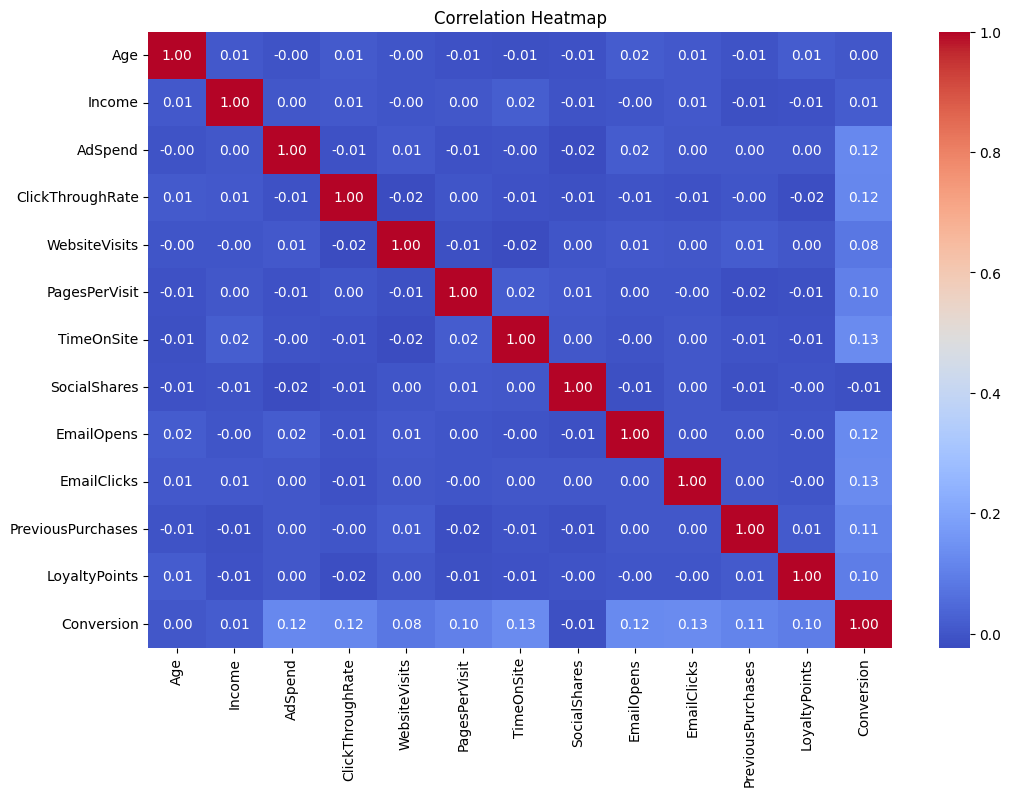

In [9]:
import seaborn as sns
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df.drop('Conversion', axis = 1)
y = df['Conversion']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

categorical_features = X_train.select_dtypes(include = ['object', 'category']).columns.to_list()

te = TargetEncoder(random_state = 42)

transformers = [('te', te, categorical_features)]

preprocessor = ColumnTransformer(transformers,
                                 remainder = 'passthrough',
                                 verbose_feature_names_out = False)
preprocessor.set_output(transform = 'pandas')

X_train_prep = preprocessor.fit_transform(X_train, y_train)
X_test_prep = preprocessor.transform(X_test)

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',random_state = 42)
clf.fit(X_train_prep, y_train)
y_pred_train = clf.predict(X_train_prep)
y_pred_test = clf.predict(X_test_prep)

print(f"Train f1_score: {f1_score(y_train, y_pred_train):.4f}")
print(f"Test f1_score: {f1_score(y_test, y_pred_test):.4f}")

print(f"Train confusion_matrix:\n {confusion_matrix(y_train, y_pred_train)}")
print(f"Test confusion_matrix:\n {confusion_matrix(y_test, y_pred_test)}")

accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy with best parameters: {accuracy}")

Train f1_score: 1.0000
Test f1_score: 0.8999
Train confusion_matrix:
 [[ 790    0]
 [   0 5610]]
Test confusion_matrix:
 [[  67  131]
 [ 148 1254]]
Test accuracy with best parameters: 0.825625


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None,8,9, 10,11,13,15, 20, 30],
    'min_samples_split': [2,3,4, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_prep, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Train a new model with the best parameters
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train_prep, y_train)

# Predict on the test set
y_pred = best_clf.predict(X_test_prep)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best parameters: {accuracy}")

Best parameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.8815625
Test accuracy with best parameters: 0.8575


In [ ]:
# Train a full tree
clf_full = DecisionTreeClassifier(criterion='gini',random_state=42,class_weight = {0:0.1,1:0.9})  # No restrictions on growth
clf_full.fit(X_train_prep, y_train)

# Get cost complexity pruning path
path = clf_full.cost_complexity_pruning_path(X_train_prep, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train multiple trees with different alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=42, ccp_alpha=ccp_alpha,class_weight = {0:0.1,1:0.9})
    clf.fit(X_train_prep, y_train)
    clfs.append(clf)

# Evaluate the trees
train_scores = [clf.score(X_train_prep, y_train) for clf in clfs]
test_scores = [clf.score(X_test_prep, y_test) for clf in clfs]



# Choose a suitable alpha based on the plot or other criteria
best_alpha_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_alpha_index]

# Train the final model with the best alpha
best_clf_post = DecisionTreeClassifier(criterion='gini',random_state=42, ccp_alpha=best_alpha,class_weight = {0:0.1,1:0.9})
best_clf_post.fit(X_train_prep, y_train)

y_pred_post = best_clf_post.predict(X_test_prep)
accuracy_post = accuracy_score(y_test, y_pred_post)
print(f"Test accuracy with post-pruning (best alpha={best_alpha}): {accuracy_post}")

Test accuracy with post-pruning (best alpha=0.00011141437140906639): 0.88375


In [ ]:
# Pre-pruning (using GridSearchCV)
print("\nPre-pruning (GridSearchCV) Results:")
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")
print(f"Test accuracy: {accuracy}")


# Post-pruning (Cost Complexity Pruning)
print("\nPost-pruning (Cost Complexity Pruning) Results:")
print(f"Best alpha: {best_alpha}")
print(f"Test accuracy: {accuracy_post}")


Pre-pruning (GridSearchCV) Results:
Best parameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.8815625
Test accuracy: 0.8575

Post-pruning (Cost Complexity Pruning) Results:
Best alpha: 0.00011141437140906639
Test accuracy: 0.88375


In [ ]:
from sklearn.metrics import classification_report

# Pre-pruning classification report
y_pred_pre = best_clf.predict(X_test_prep)
print("\nClassification Report (Pre-pruning):")
print(classification_report(y_test, y_pred_pre))


# Post-pruning classification report
y_pred_post = best_clf_post.predict(X_test_prep)
print("\nClassification Report (Post-pruning):")
print(classification_report(y_test, y_pred_post))


Classification Report (Pre-pruning):
              precision    recall  f1-score   support

           0       0.39      0.28      0.33       198
           1       0.90      0.94      0.92      1402

    accuracy                           0.86      1600
   macro avg       0.65      0.61      0.62      1600
weighted avg       0.84      0.86      0.85      1600


Classification Report (Post-pruning):
              precision    recall  f1-score   support

           0       0.69      0.11      0.19       198
           1       0.89      0.99      0.94      1402

    accuracy                           0.88      1600
   macro avg       0.79      0.55      0.56      1600
weighted avg       0.86      0.88      0.85      1600

